In [1]:
#import the necessary liblaries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
# Tensorflow and Keras Modules
import tensorflow as tf
from keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input, AveragePooling2D
import keras

In [2]:
# create empty lists to store image paths, age labels, and gender labels

image_paths = []
age_labels = []
gender_labels = []

In [3]:
# iterate over files in the directory
for filename in (os.listdir('archive/UTKFace/')):
    image_path = os.path.join('archive/UTKFace/', filename)
    temp = filename.split('_')
    #get age from 0
    age = int(temp[0])
    #get gender from 1
    gender = int(temp[1])
    #append all
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

In [4]:
image_paths

['archive/UTKFace/9_1_2_20161219204347420.jpg.chip.jpg',
 'archive/UTKFace/36_0_1_20170117163203851.jpg.chip.jpg',
 'archive/UTKFace/86_1_0_20170120225751953.jpg.chip.jpg',
 'archive/UTKFace/26_1_0_20170116171048641.jpg.chip.jpg',
 'archive/UTKFace/1_1_2_20161219154612988.jpg.chip.jpg',
 'archive/UTKFace/52_0_1_20170117161018159.jpg.chip.jpg',
 'archive/UTKFace/25_1_0_20170117134403373.jpg.chip.jpg',
 'archive/UTKFace/16_0_0_20170104003740977.jpg.chip.jpg',
 'archive/UTKFace/27_0_3_20170119210058457.jpg.chip.jpg',
 'archive/UTKFace/36_0_3_20170119180245724.jpg.chip.jpg',
 'archive/UTKFace/58_0_2_20170116193704928.jpg.chip.jpg',
 'archive/UTKFace/6_1_0_20170114024512634.jpg.chip.jpg',
 'archive/UTKFace/35_1_2_20170116185947151.jpg.chip.jpg',
 'archive/UTKFace/1_1_3_20161219230734016.jpg.chip.jpg',
 'archive/UTKFace/26_1_1_20170103181931657.jpg.chip.jpg',
 'archive/UTKFace/2_0_2_20161219141650121.jpg.chip.jpg',
 'archive/UTKFace/53_1_0_20170110143534851.jpg.chip.jpg',
 'archive/UTKFace/3

In [4]:
# define a dictionary to map gender labels to their corresponding names
gender_dict = {0:'Homme', 1:'Femme'}

In [5]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

image  age  gender
0  archive/UTKFace/9_1_2_20161219204347420.jpg.ch...    9       1
1  archive/UTKFace/36_0_1_20170117163203851.jpg.c...   36       0
2  archive/UTKFace/86_1_0_20170120225751953.jpg.c...   86       1
3  archive/UTKFace/26_1_0_20170116171048641.jpg.c...   26       1
4  archive/UTKFace/1_1_2_20161219154612988.jpg.ch...    1       1

In [7]:
#df['sexe'] = df['gender'].map({0: 'Homme', 1: 'Femme'})
#df

## Descriptive analysis

In [8]:
# display basic statistics and information about the dataframe
df.describe()

age        gender
count  23708.000000  23708.000000
mean      33.303484      0.477349
std       19.886112      0.499497
min        1.000000      0.000000
25%       23.000000      0.000000
50%       29.000000      0.000000
75%       45.000000      1.000000
max      116.000000      1.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   23708 non-null  object
 1   age     23708 non-null  int64 
 2   gender  23708 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 555.8+ KB


<Axes: xlabel='age', ylabel='Count'>

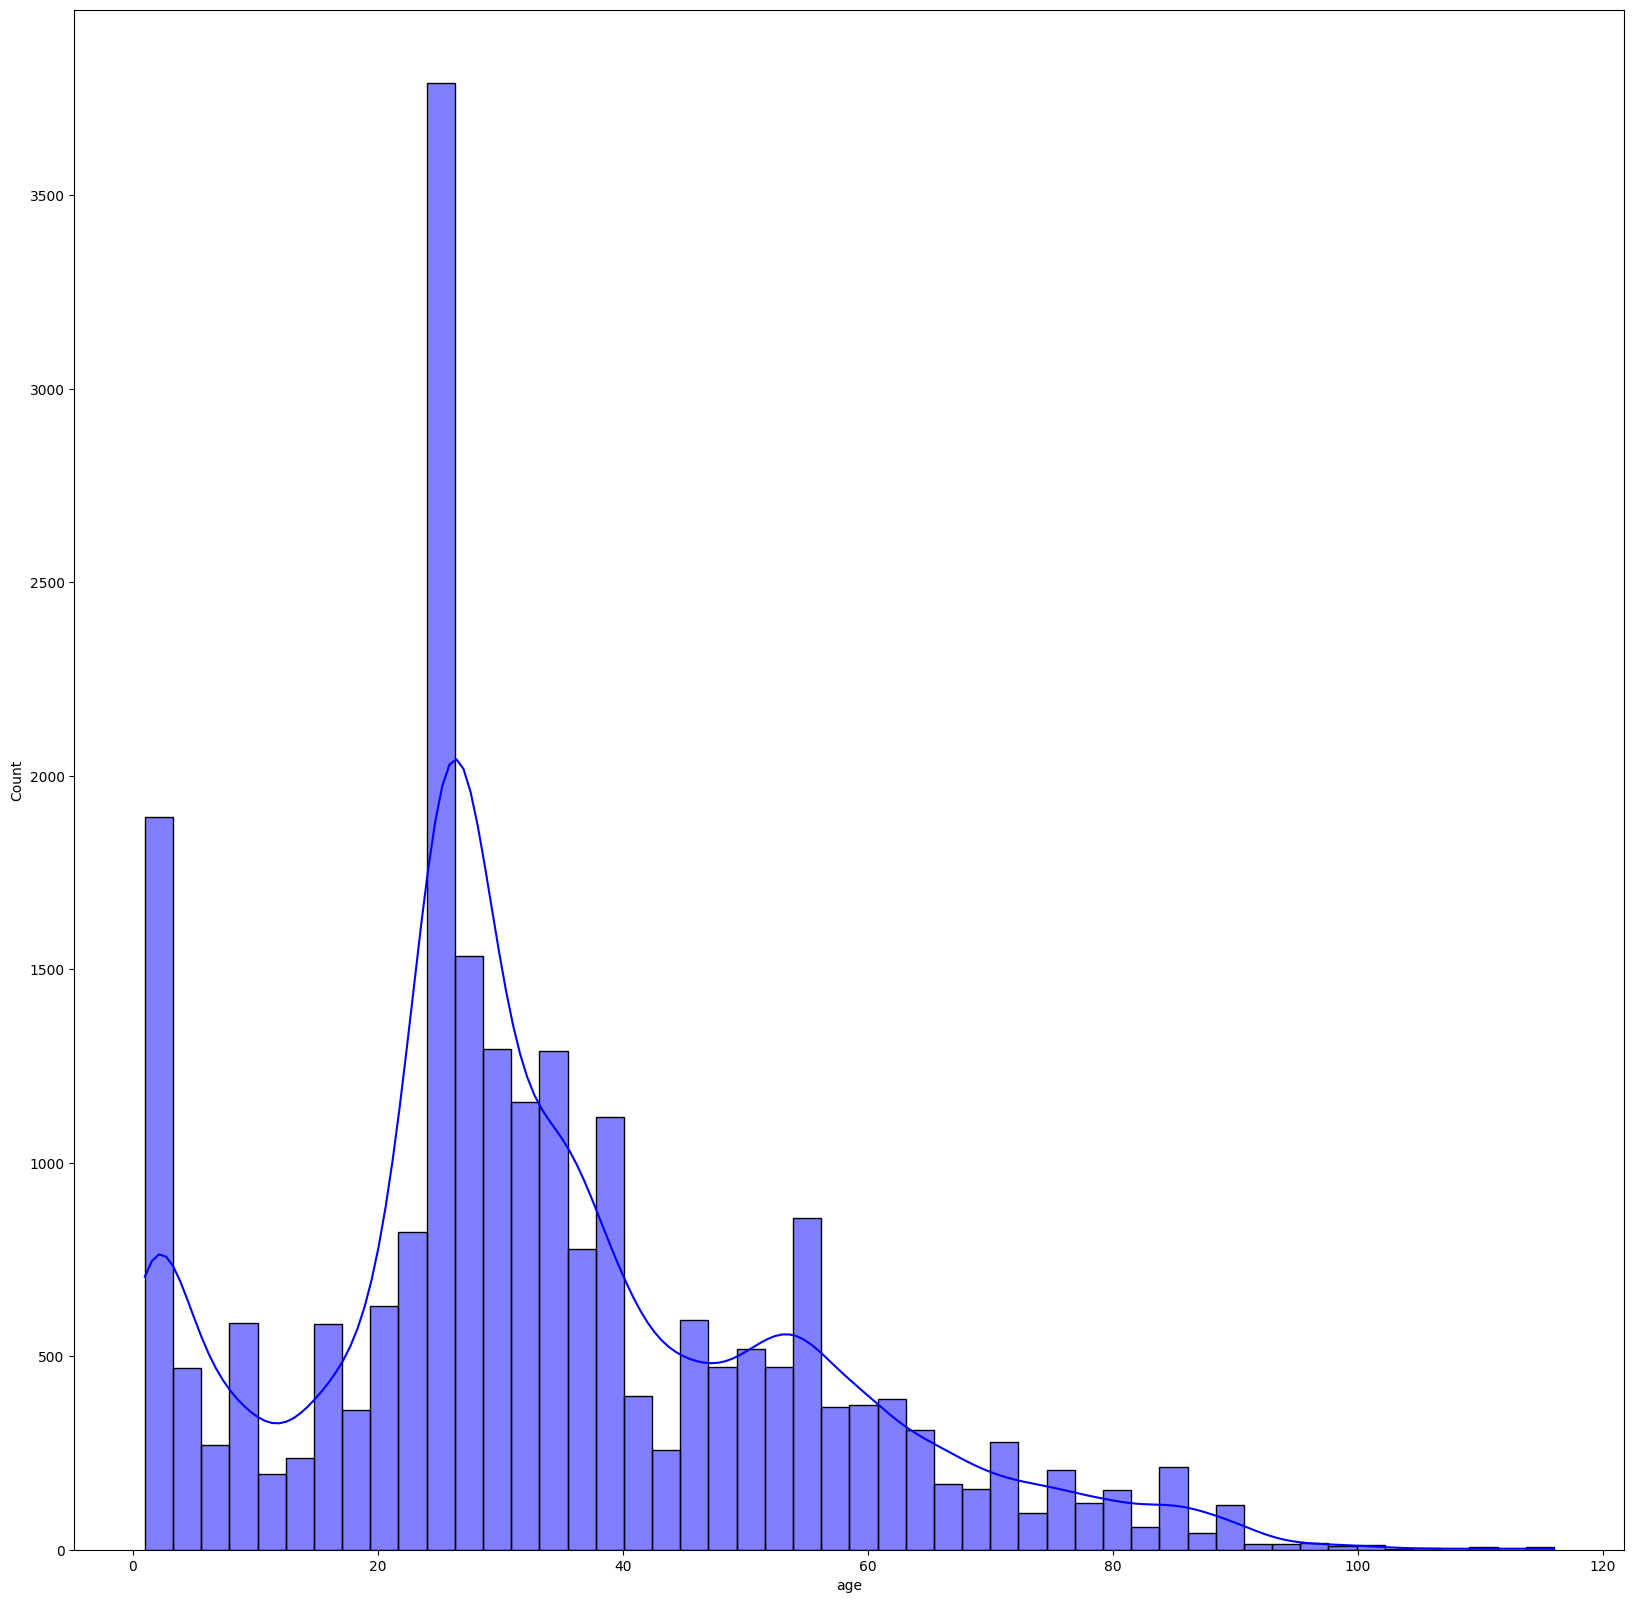

In [7]:
#plot the age distribution
plt.figure(figsize=(20, 20))

sns.histplot(df['age'], kde=True, bins=50, color='blue')

<Axes: xlabel='gender', ylabel='age'>

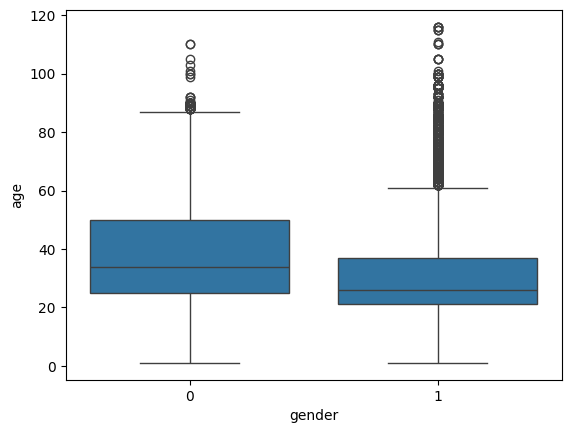

In [12]:
# plot the age distribution by gender
sns.boxplot(x='gender', y='age', data=df)

<Axes: xlabel='gender', ylabel='age'>

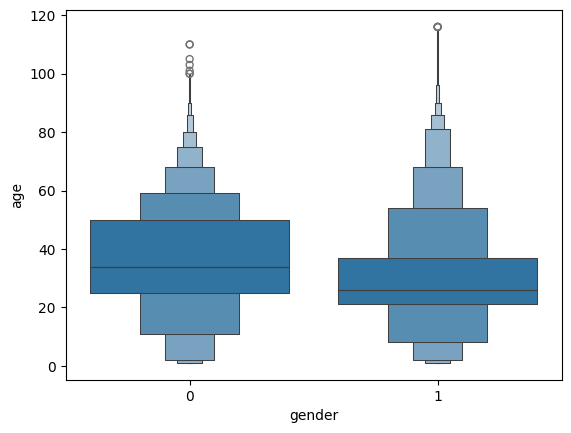

In [14]:

# plot the age distribution by gender using boxenplot
sns.boxenplot(x='gender', y='age', data=df)

<Axes: xlabel='gender', ylabel='count'>

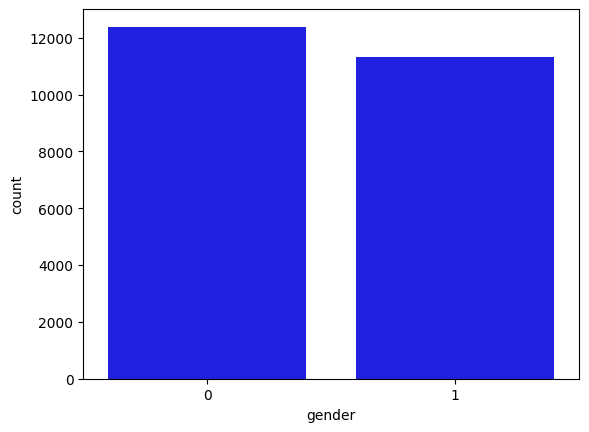

In [15]:
# plot the count of each gender
sns.countplot(x='gender', data=df, color='blue')

###  Plot

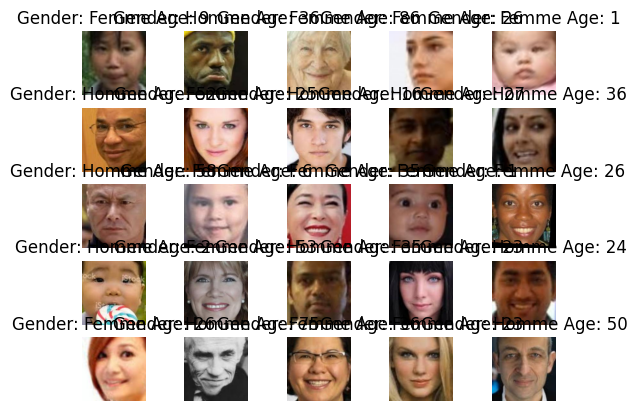

In [6]:
#Plot 25 images of our dataset with their corresponding gender and age labels
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Gender: {gender_dict[gender]} Age: {age}")
    plt.axis('off')

## Image preprocessing

In [7]:
# function to extract features from images
from PIL import Image
def extract_features(images):

    """
    Extracts features from the given image.

    Parameters:
    image (array-like): The input image.

    Returns:
    array-like: The extracted features.

    """
     
    features = []
    for image in images:
        # change to gray image
        img = load_img(image, color_mode='grayscale')
        #resize by 128*128
        img = img.resize((128, 128), Image.LANCZOS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 128, 128,1 )

    return features

In [8]:
X = extract_features(df['image'])
X.shape


(23708, 128, 128, 1)

In [9]:
# Normalize the features
X = X/255.0

In [10]:
# create arrays for gender labels and age labels
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

y_age
y_gender

array([1, 0, 1, ..., 0, 0, 1])

## Model Building

### Model 1

In [20]:
#Create Model
input_shape = (128, 128, 1)
# declare input
inputs = Input((input_shape))
# Convolutional layers 1
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
# Convolutional layers 2
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
# Convolutional layers 3
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
# Convolutional layers 4
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)


flatten = Flatten() (maxp_4)

# Fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

# two outputs
output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

# compile the model
model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])

2024-06-18 21:12:18.116987: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-06-18 21:12:18.117022: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-06-18 21:12:18.117029: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-06-18 21:12:18.117052: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-18 21:12:18.117069: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [35]:
from tensorflow.keras.utils import plot_model
# plot the model architecture

keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    rankdir="TB",
    dpi=200,
    show_layer_activations=True,
    show_trainable=True,
)

#plot the model

You must install pydot (`pip install pydot`) for `plot_model` to work.


#### Training

In [21]:
# train the model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30


2024-06-18 21:12:24.569897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


593/593 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - age_out_mae: 16.1080 - gender_out_accuracy: 0.6730 - loss: 18.3201 - val_age_out_mae: 10.7065 - val_gender_out_accuracy: 0.7699 - val_loss: 11.1696
Epoch 2/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - age_out_mae: 10.6253 - gender_out_accuracy: 0.8057 - loss: 11.0499 - val_age_out_mae: 10.5413 - val_gender_out_accuracy: 0.8167 - val_loss: 10.9164
Epoch 3/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - age_out_mae: 9.5239 - gender_out_accuracy: 0.8326 - loss: 9.8851 - val_age_out_mae: 9.3378 - val_gender_out_accuracy: 0.8452 - val_loss: 9.6776
Epoch 4/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 27s 45ms/step - age_out_mae: 8.9014 - gender_out_accuracy: 0.8478 - loss: 9.2456 - val_age_out_mae: 8.0025 - val_gender_out_accuracy: 0.8444 - val_loss: 8.3338
Epoch 5/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - age_out_mae: 8.4464 - gender_out_accuracy: 0.8498 - loss: 8.7684 - val_age_out_mae: 7.7937 - val_gender_out_accuracy: 0.8568 - val_loss: 8.1157
Epo

In [25]:
history.history.keys()

dict_keys(['age_out_mae', 'gender_out_accuracy', 'loss', 'val_age_out_mae', 'val_gender_out_accuracy', 'val_loss'])

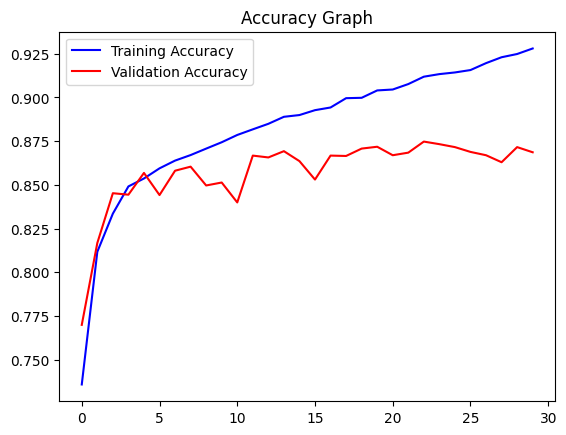

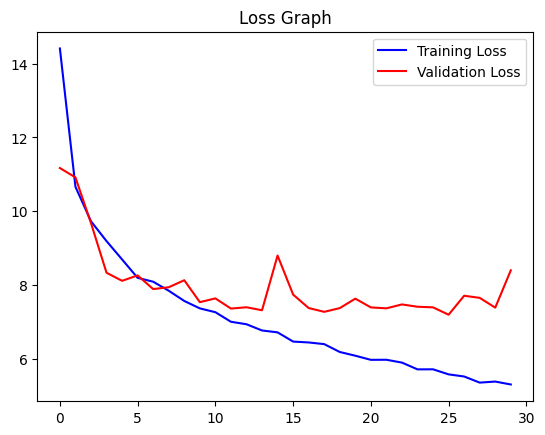

In [26]:
# plot the training and validation accuracy for gender prediction
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

# plot the training and validation loss for gender prediction
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

### Model 2

In [13]:
#Create Model
input_shape = (128, 128, 1)
# declare input
inputs = Input((input_shape))
# Convolutional layers 1
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
avg_1 = AveragePooling2D(pool_size=(2, 2)) (conv_1)
# Convolutional layers 2
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (avg_1)
avg_2 = AveragePooling2D(pool_size=(2, 2)) (conv_2)
# Convolutional layers 3
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (avg_2)
avg_3 = AveragePooling2D(pool_size=(2, 2)) (conv_3)
# Convolutional layers 4
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (avg_3)
avg_4 = AveragePooling2D(pool_size=(2, 2)) (conv_4)


flatten = Flatten() (avg_4)

# Fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

# two outputs
output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model2 = Model(inputs=[inputs], outputs=[output_1, output_2])

model2.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])

In [24]:
# plot the model architecture

keras.utils.plot_model(
    model2,
    to_file="model2.png",
    show_shapes=True,
    show_dtype=True,
    rankdir="TB",
    dpi=200,
    show_layer_activations=True,
    show_trainable=True,
)

#plot the model

You must install pydot (`pip install pydot`) for `plot_model` to work.


#### Training

In [17]:
# train the model
history2 = model2.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30


2024-06-19 09:08:45.852585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


593/593 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - age_out_mae: 16.8997 - gender_out_accuracy: 0.5282 - loss: 17.6230 - val_age_out_mae: 14.6989 - val_gender_out_accuracy: 0.5192 - val_loss: 15.3783
Epoch 2/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - age_out_mae: 14.1831 - gender_out_accuracy: 0.6317 - loss: 14.8173 - val_age_out_mae: 12.2487 - val_gender_out_accuracy: 0.7564 - val_loss: 12.7464
Epoch 3/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - age_out_mae: 11.9095 - gender_out_accuracy: 0.7585 - loss: 12.4012 - val_age_out_mae: 10.7279 - val_gender_out_accuracy: 0.7864 - val_loss: 11.1809
Epoch 4/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - age_out_mae: 10.6072 - gender_out_accuracy: 0.7849 - loss: 11.0560 - val_age_out_mae: 10.2560 - val_gender_out_accuracy: 0.7992 - val_loss: 10.6723
Epoch 5/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - age_out_mae: 10.0326 - gender_out_accuracy: 0.8033 - loss: 10.4511 - val_age_out_mae: 9.3401 - val_gender_out_accuracy: 0.8172 - val_loss: 

In [18]:
history2.history.keys()

dict_keys(['age_out_mae', 'gender_out_accuracy', 'loss', 'val_age_out_mae', 'val_gender_out_accuracy', 'val_loss'])

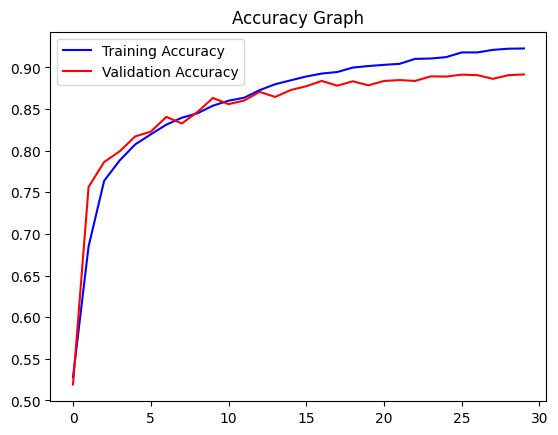

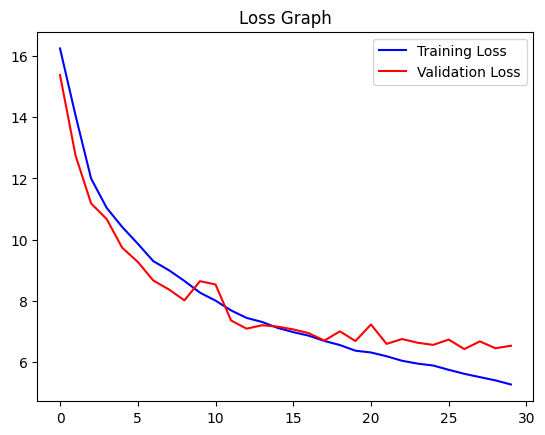

In [19]:
# plot the training and validation accuracy for gender prediction
acc = history2.history['gender_out_accuracy']
val_acc = history2.history['val_gender_out_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
# plot the training and validation loss for gender prediction
loss = history2.history['loss']
val_loss = history2.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

## Predictions

### Model 1 (MaxPooling)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x103e804c0>>
Traceback (most recent call last):
  File "/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


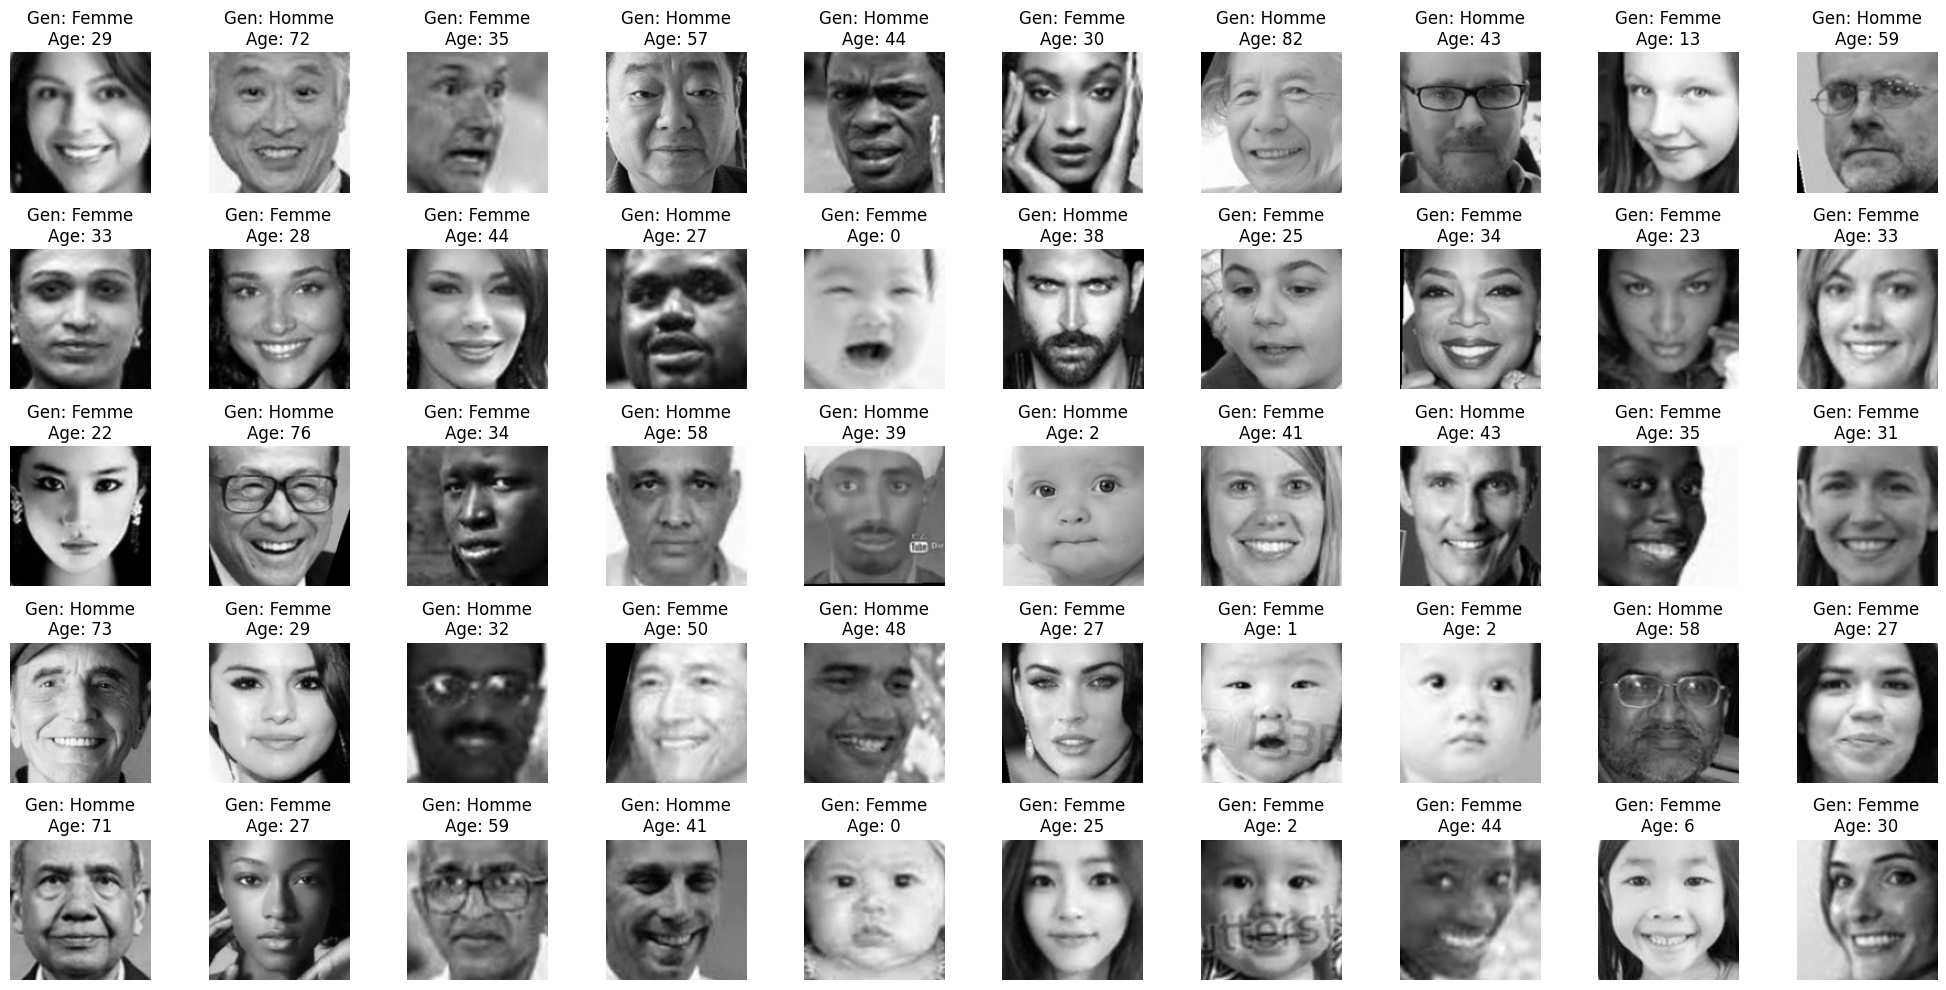

In [31]:
gender_dict = {0:'Homme', 1:'Femme'}
# randomly select 50 images

indices = np.random.choice(len(X), 50, replace=False)
batch_images = X[indices].reshape(50, 128, 128, 1)
predictions = model.predict(batch_images)
predicted_genders = [gender_dict[round(pred[0])] for pred in predictions[0]]
predicted_ages = [round(pred[0]) for pred in predictions[1]]

# display the randomly selected images with their predicted gender and age labels
fig, axes = plt.subplots(5, 10, figsize=(20, 10))  
axes = axes.flatten()

for i, idx in enumerate(indices):
    axes[i].imshow(X[idx].reshape(128, 128), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Genre: {predicted_genders[i]}\nAge: {predicted_ages[i]}")

plt.tight_layout()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


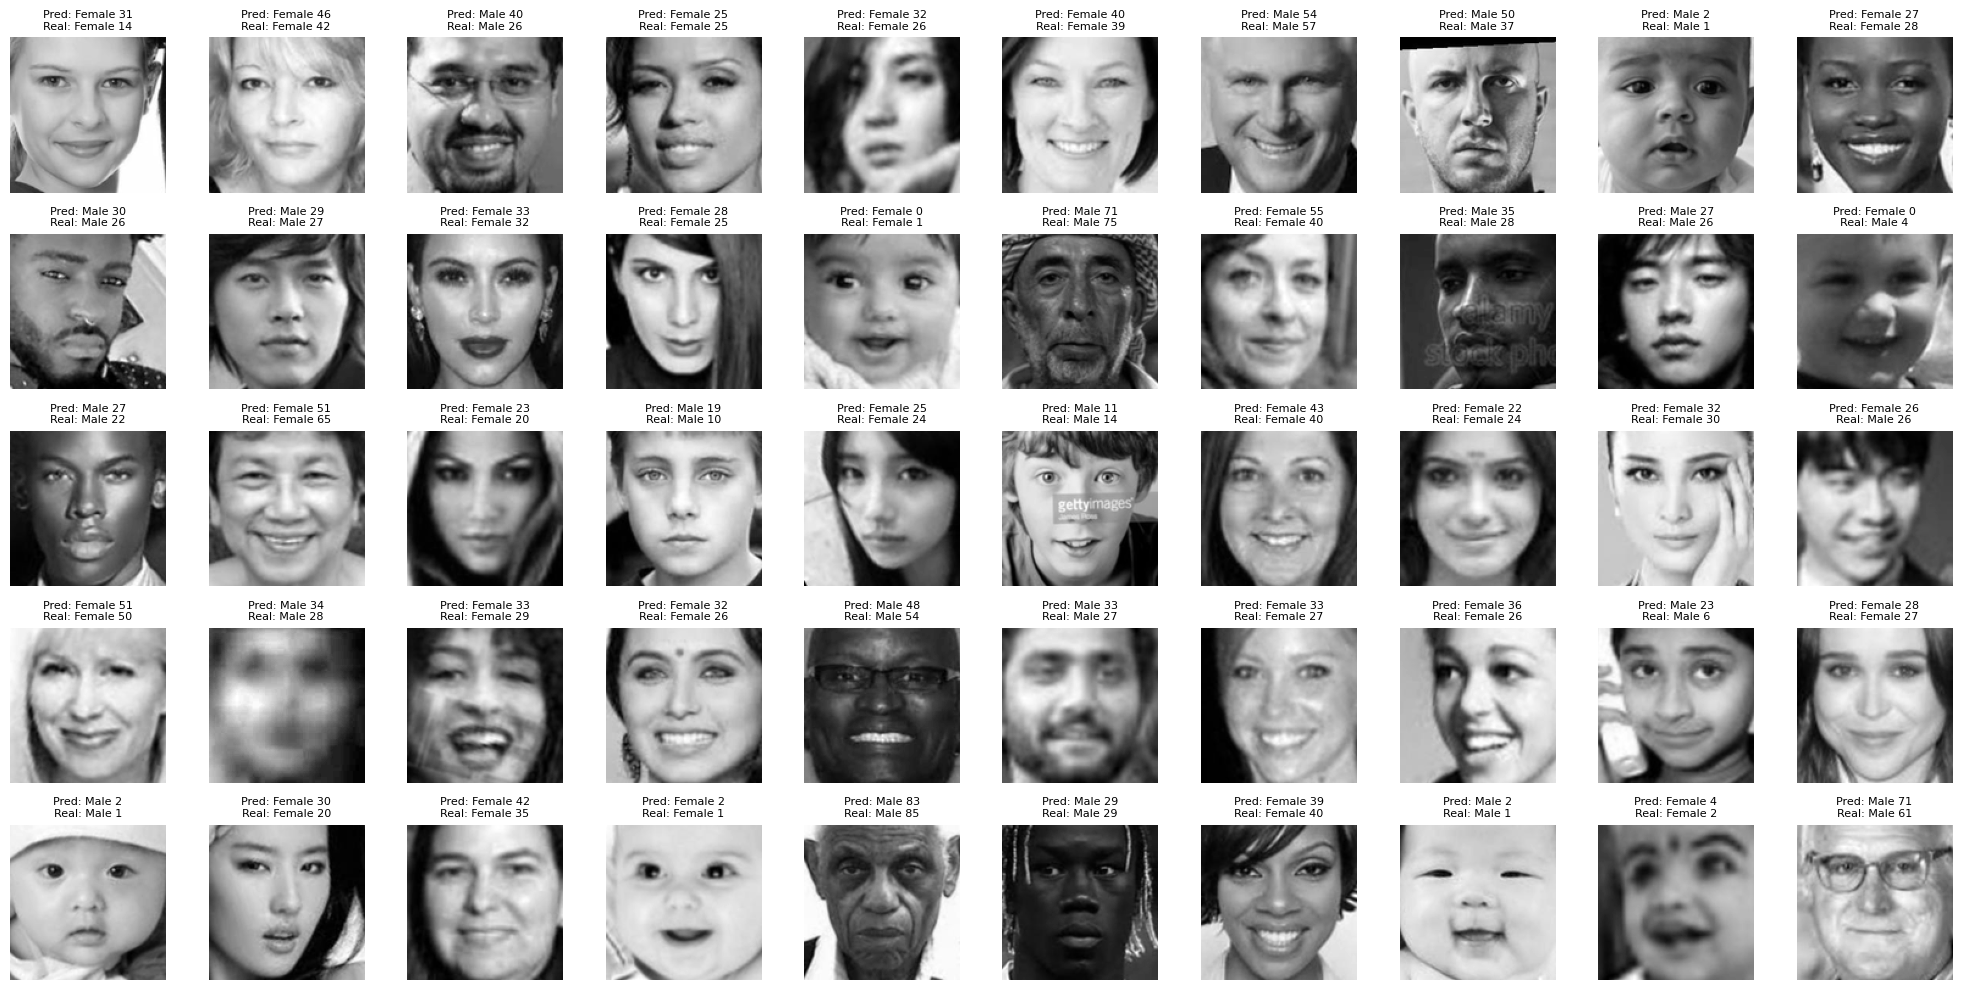

Gender Accuracy: 96.00%
Mean Absolute Error for Age: 4.84 years


In [36]:
import numpy as np
import matplotlib.pyplot as plt

gender_dict = {1: 'Female', 0: 'Male'}

indices = np.random.choice(len(X), 50, replace=False)
batch_images = X[indices].reshape(50, 128, 128, 1)

#True labels
real_genders = y_gender[indices]
real_ages = y_age[indices]

predictions = model.predict(batch_images)
predicted_genders = [gender_dict[round(pred[0])] for pred in predictions[0]]
predicted_ages = [round(pred[0]) for pred in predictions[1]]

# accuracy for gender and  MAE for age
accuracy_gender = np.mean([real_genders[i] == round(predictions[0][i][0]) for i in range(50)])
mae_age = np.mean(np.abs(real_ages - np.array(predicted_ages)))

fig, axes = plt.subplots(5, 10, figsize=(20, 10))  # 5 lignes, 10 colonnes
axes = axes.flatten()

for i, idx in enumerate(indices):
    axes[i].imshow(X[idx].reshape(128, 128), cmap='gray')
    axes[i].axis('off')
    title_text = f"Pred: {predicted_genders[i]} {predicted_ages[i]}\nReal: {gender_dict[real_genders[i]]} {real_ages[i]}"
    axes[i].set_title(title_text, fontsize=8)

plt.tight_layout()
plt.show()

# pritn accuracy  and MAE
print(f"Gender Accuracy: {accuracy_gender*100:.2f}%")
print(f"Mean Absolute Error for Age: {mae_age:.2f} years")


### Model 2 (AveragePooling)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


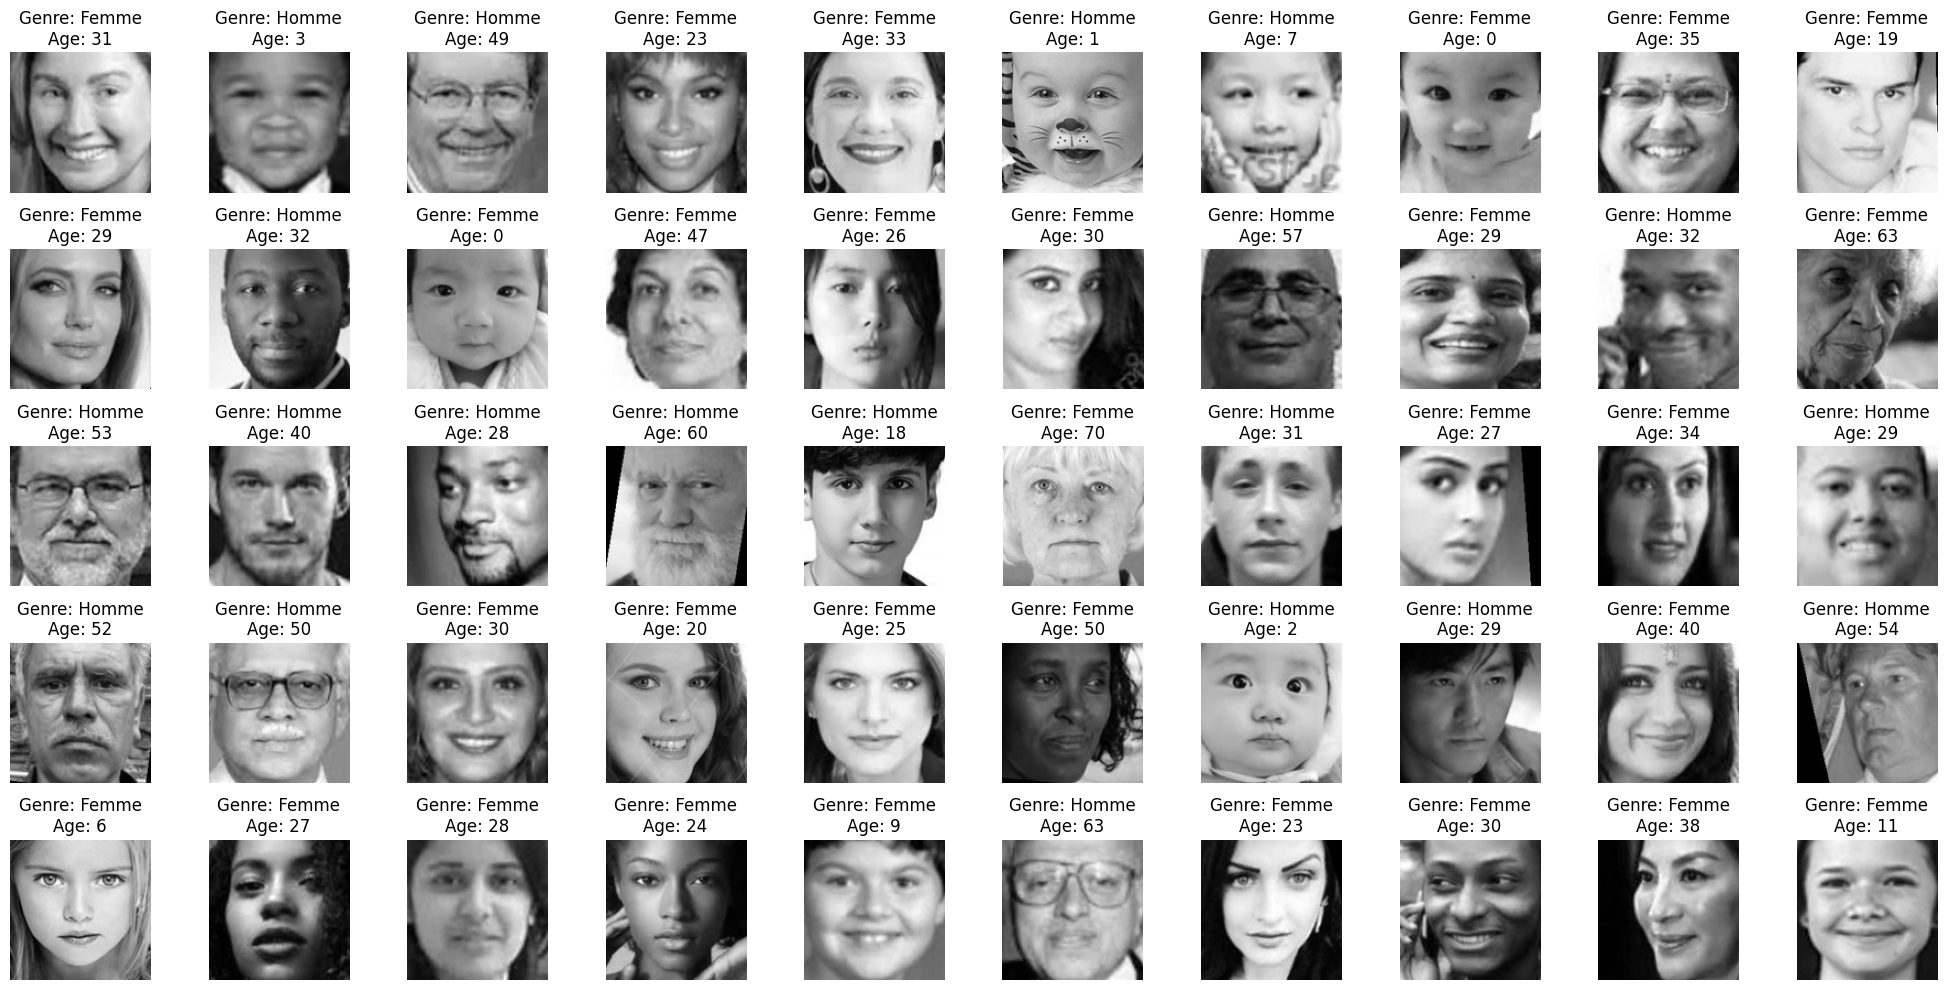

In [21]:
indices = np.random.choice(len(X), 50, replace=False)
batch_images = X[indices].reshape(50, 128, 128, 1)
predictions = model2.predict(batch_images)
predicted_genders = [gender_dict[round(pred[0])] for pred in predictions[0]]
predicted_ages = [round(pred[0]) for pred in predictions[1]]

# display the randomly selected images with their predicted gender and age labels
fig, axes = plt.subplots(5, 10, figsize=(20, 10))  
axes = axes.flatten()

for i, idx in enumerate(indices):
    axes[i].imshow(X[idx].reshape(128, 128), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Genre: {predicted_genders[i]}\nAge: {predicted_ages[i]}")

plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


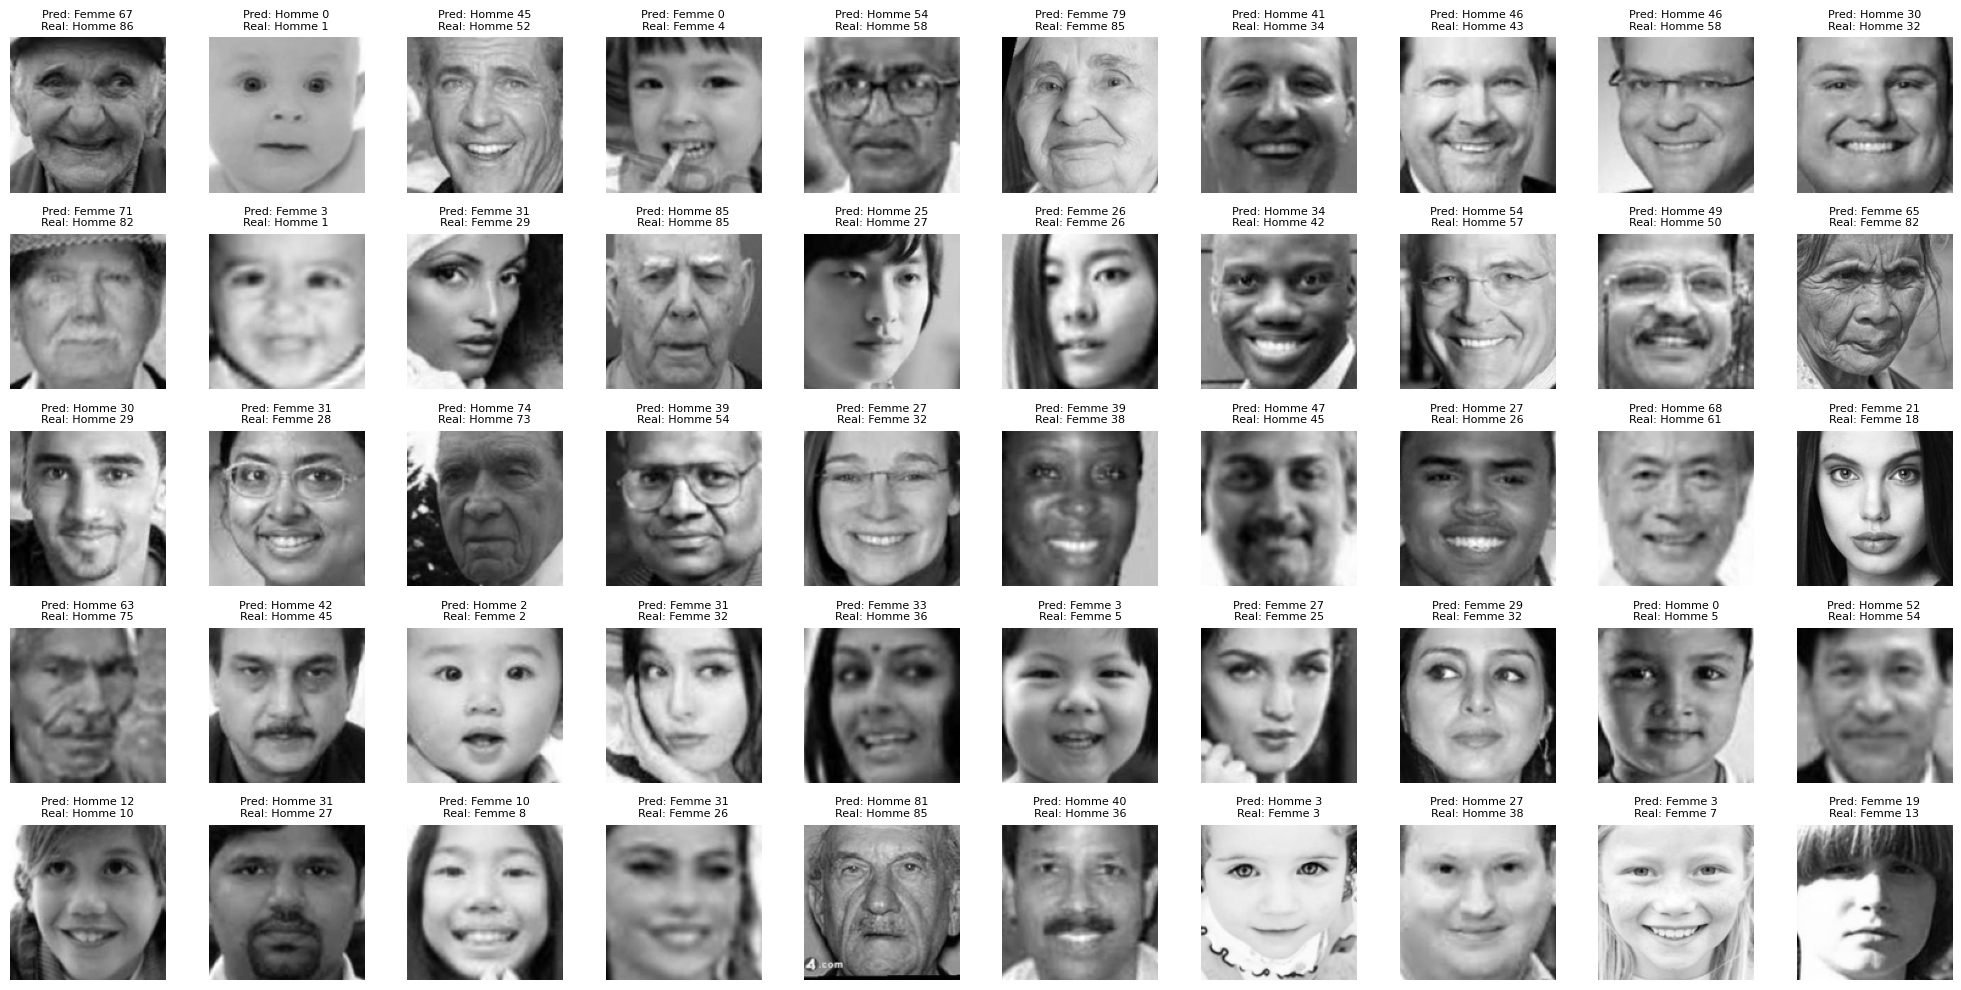

Gender Accuracy: 88.00%
Mean Absolute Error for Age: 4.50 years


In [22]:
indices = np.random.choice(len(X), 50, replace=False)
batch_images = X[indices].reshape(50, 128, 128, 1)

#True labels
real_genders = y_gender[indices]
real_ages = y_age[indices]

predictions = model2.predict(batch_images)
predicted_genders = [gender_dict[round(pred[0])] for pred in predictions[0]]
predicted_ages = [round(pred[0]) for pred in predictions[1]]

# accuracy for gender and  MAE for age
accuracy_gender = np.mean([real_genders[i] == round(predictions[0][i][0]) for i in range(50)])
mae_age = np.mean(np.abs(real_ages - np.array(predicted_ages)))

fig, axes = plt.subplots(5, 10, figsize=(20, 10))  # 5 lignes, 10 colonnes
axes = axes.flatten()

for i, idx in enumerate(indices):
    axes[i].imshow(X[idx].reshape(128, 128), cmap='gray')
    axes[i].axis('off')
    title_text = f"Pred: {predicted_genders[i]} {predicted_ages[i]}\nReal: {gender_dict[real_genders[i]]} {real_ages[i]}"
    axes[i].set_title(title_text, fontsize=8)

plt.tight_layout()
plt.show()

# pritn accuracy  and MAE
print(f"Gender Accuracy: {accuracy_gender*100:.2f}%")
print(f"Mean Absolute Error for Age: {mae_age:.2f} years")

# Save the model

In [ ]:
model.save("gender_age_detection_model1_max.keras")
# save the model

In [23]:
model2.save("gender_age_detection_model2_avg.keras")